# ДЗ №2. Калибровка ELISA-теста

В данном задании вы будете разрабатывать калибровку для [ELISA-теста](https://ru.wikipedia.org/wiki/Иммуноферментный_анализ), определяющего наличие особо опасного штамма вируса гриппа.

Выполнять на ядре версии `3.7`.

## Требования к сдаче задания

1. Дедлайн **4 апреля в 23:59 по МСК**. После дедлайна работы не принимаются, кроме случаев наличия уважительной причины.
2. Сдача будет организована через google-форму.
3. У каждого студента есть свой **трёхзначный** уникальный номер (далее &mdash; `<ID>`).
4. В форму нужно загрузить заполненный ноутбук под именем `HW2_<ID>.ipynb`. Например, если ваш номер `023`, то вы должны переименовать его из `HW2.ipynb` в `HW2_023.ipynb` и загрузить. Архивировать его не нужно, дополнительные файлы также загружать не надо.
5. Весь код в данном ноутбуке должен запускаться.

## Теория

Вирусы гриппа вызывают ряд острых респираторных заболеваний и являются причинами переодических эпидемий и пандемий.

Некоторые из них наш организм переносит без особых осложнений, другие могут быть особенно [смертоносными](https://ru.wikipedia.org/wiki/Испанский_грипп).

Вирусы гриппа подразделяются на несколько родов (`A`, `B`, `C` и `D`), представитель каждого из которых в дополнение к этому характеризуется определённым `серотипом`. Давайте разберёмся, что же это такое.

Упрощённо вирус гриппа можно представить следующей схемой.



Как можно видеть, вирион гриппа состоит из внутренней полости, содержащей генетический материал, и оболочки. Оболочка, в свою очередь, построена из множества копий молекул 2-х типов &mdash; белков: [гемагглютинина](https://ru.wikipedia.org/wiki/Гемагглютинин) и [нейраминидазы](https://ru.wikipedia.org/wiki/Нейраминидаза).

При заражении вирусной инфекцией иммунная система начинает искать способы борьбы с ней. Сущетсвуют две принципиально разные ситуации:
- Когда вирус проник и размножается в клетке хозяина,
- Когда вирион свободно путешествует по организму, ища возможность проникнуть в клетку для размножения.

В первом случае иммунная система обычно стремится найти и уничтожить уже заражённые клетки. Во втором &mdash; нейтрализовать вирионы. Эти, в принципе, похожие задачи решаются двумя различными типами иммунитета. Для выполнения этого задания крайне полезно представлять, как работает последний тип, ответственный за уничтожение вирионов.

### Гуморальный иммунитет

Процесс нейтрализации вирионов подчиняется следующему алгоритму:
- Организм учится определять отличительные характеристики, присущие вирионам данного конкретного типа вируса.

Это достигается посредством хитрого механизма, называемого [V(D)J-рекомбинацией](https://ru.wikipedia.org/wiki/V(D)J-рекомбинация). Для нас главное, что по его завершению иммунитет умеет производить специальные молекулы, специфично прилипающие к вирусным частицам. Эти молекулы называются [антителами](https://ru.wikipedia.org/wiki/Антитела). Антитела &mdash; это белки, имеющие склонность притягиваться к вирионам данного конкретного типа вируса посредством Ван-дер-Ваальсова взаимодействия.

Как только аминокислотная последовательность подходящего антитела подобрана, происходит следующее.
- Организм клонирует специальные клетки, производящие этот конкретный вариант антител.
- Иммунная система доставляет антитела в место заражения.
- Специальные клетки начинают уничтожение всего, к чему заякорились эти антитела.

На всякий случай, организм запоминает последовательность подобранного антитела, так что повторное заражение тем же или похожим вирусом вызовет немедленную или намного более скорую реализацию последних трёх шагов. Это и называется `приобритённым иммунитетом`.

Тем не менее вирусы постоянно ищут способы обойти приобретённые защитные механизмы и эволюционируют в сторону изменения молекулярной структуры своих компонентов так, чтобы антитела перестали их узнавать.

### Серотип

Соверешенно очевидно, что антитела обычно подбираются под белки, составляющие оболочку вирионов. И как уже упоминалось, в контексте вируса гриппа таких белков 2: гемагглютинин (**H**) и нейраминидаза (**N**).

Все вы, наверное, слышали о штаммах, именуемых **H1N1** или **H2N3**. Так вот, эти цифры обозначают конкретный вариант гемагглютинина и нейраминидазы соответсвенно, из которых состоит оболочка вирионов. Уникальное сочетание вариантов **H** и **N** и назывется `серотипом`. Как можно догадаться, если организм уже научился бороться с вирусом определённого серотипа, то дальнейшие его встречи с тем же серотипом не должны составлять для него проблем.

На самом деле, всё ещё сложнее, и например, белки оболочки вирионов испанского гриппа 1918 года (который был **H1N1**) могут настолько сильно отличаться от белков оболочки более современных вариантов штамма с тем же серотипом, что антитела для определения одного могут совершенно не подходить для другого.

## Постановка задачи

Как бы то ни было, представьте, что в одной далёкой стране зафиксирована вспышка вируса гриппа неизвестного серотипа. И наша задача заключается в том, чтобы:
1. Определить его серотип.
2. Откалибровать оборудование, предназначенное для идентификации присутствия этого вируса в пробе.

У нас есть:
1. Антитела, специфичные к белкам **H1**, **H2**, **H3**, **H4**, **H5** и **N1**, **N2**, **N3**, **N4**, **N5**, **N6**, **N7**.
2. Пробы, полученные от 327 здоровых и 48 заражённых этим штаммом пациентов.
3. Результаты ELISA-теста реакций каждого антитела с каждой пробой.

Что же такое ELISA-тест? По сути, это набор методов для измерения интенсивности реакций между веществами в растворе с крайне малой концентрацией.

Числа, получаемые в ELISA-тесте, пропорциональны интенсивности реакции. Например, если реакция сопровождается измнением pH, то удобно использовать сверхчувствительный pH-метр на полупроводниковых электодах. А саму измеренную величину и направление изменения рассматривать в качестве интенсивности реакции.

В случае нашей задачи просто считайте, что при реакции антитела с вирусными частицами происходит изменение позрачности раствора, регистрируемое сверхчувствительной аппаратурой. А числа в таблице просто показывают величину и направление изменения прозрачности.

Также считайте, что реакции проведены в одинаковых условиях при одинаковом титре вирусных частиц (для проб заражённых пациентов) и одинаковой концентрации антител.

### Загрузка данных

Вам будет предоставлено 2 таблицы, содержащие:
- Номер пациента и его статус (болен / не болен)
- Результаты попарных ELISA-тестов между пробами пациентов и антителами

Для работы с ними будет необходимо воспользоваться библиотекой `Pandas`, поэтому изучите соответсвующий ноутбук.

А пока загрузим данные с сервера.

In [1]:
from os import mkdir
from os.path import isfile, join as join_path
from functools import partial
from warnings import filterwarnings
from urllib3 import PoolManager

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb


DATA_DIR = 'homework_data/'
try:
    mkdir(DATA_DIR)
except FileExistsError:
    pass

to_data_dir = partial(join_path, DATA_DIR)

%matplotlib inline

In [2]:
with PoolManager() as pool:

    file = to_data_dir('ELISA_data.tsv')
    if not isfile(file):
        response = pool.request(
            'GET', 'https://mipt-stats.gitlab.io/files/mathstats_fbmf_20/sem2/homework_data/ELISA_data.tsv'
        )
        with open(file, 'wb') as out:
            out.write(response.data)

    file = to_data_dir('patient_status.csv')
    if not isfile(file):
        response = pool.request(
            'GET', 'https://mipt-stats.gitlab.io/files/mathstats_fbmf_20/sem2/homework_data/patient_status.csv'
        )
        with open(file, 'wb') as out:
            out.write(response.data)

if 'response' in locals():
    del response

Итак, мы загрузили файлы в папку `homework_data`.

Для лучшего понимания происходящего откройте загруженные файлы `homework_data/patient_status.csv` и `homework_data/ELISA_data.tsv` в любом текстовом редакторе и изучите их структуру.

А теперь считаем загруженные таблицы

In [3]:
data = pd.read_csv(to_data_dir('ELISA_data.tsv'), index_col=0, sep='\t')
data.head()

,H1 Ab,H2 Ab,H3 Ab,H4 Ab,H5 Ab,N1 Ab,N2 Ab,N3 Ab,N4 Ab,N5 Ab,N6 Ab,N7 Ab
Patient ID,,,,,,,,,,,,
1,0.066049,0.074286,-0.039821,-0.249188,0.291652,0.510564,-0.244375,-0.036992,0.173058,-0.403492,-0.041307,-0.426493
2,0.098490,-0.178538,0.017103,0.341539,-0.698644,-0.390338,0.508720,-0.162154,-0.032715,-0.054000,0.002279,-0.010394
3,-0.474249,0.091625,0.216592,0.195607,-0.139410,-0.117825,0.525555,-0.128185,-0.529284,0.095633,0.003007,-0.043820
4,-0.644830,0.287989,0.346168,-0.335711,-0.695897,-0.061603,-0.196644,-0.046465,0.313944,-0.129755,-0.193516,-0.506008
5,8.957671,15.886976,7.726296,10.616289,0.496448,1.287699,2.039855,0.885835,51.370565,0.681102,4.014436,38.722134


`Ab` в названиях колонок означает `antibody`.

Посмотрим на первую колонку

In [4]:
data['H1 Ab']

Patient ID
1      0.066049
2      0.098490
3     -0.474249
4     -0.644830
5      8.957671
         ...   
371    0.179253
372    0.313943
373   -0.043575
374   -0.101144
375    0.495596
Name: H1 Ab, Length: 375, dtype: float64

Считаем данные о статусе пациентов

In [5]:
status = pd.read_csv(
    to_data_dir('patient_status.csv'),
    dtype={'Status': pd.CategoricalDtype()},
    # Категориальный тип данных экономит память и ускоряет вычисления,
    # если требуется хранить большое количество одинаковых значений.
    # В нашем случае - это строки "Healthy" и "Ill"
    index_col=0,
    squeeze=True
)
status

Patient ID
1      Healthy
2      Healthy
3      Healthy
4      Healthy
5          Ill
        ...   
371    Healthy
372    Healthy
373    Healthy
374    Healthy
375    Healthy
Name: Status, Length: 375, dtype: category
Categories (2, object): [Healthy, Ill]

Разделим датафрейм на таблицы с больными и здоровыми пациетами

In [6]:
healthy_data = data[status == 'Healthy']
healthy_data.head()

,H1 Ab,H2 Ab,H3 Ab,H4 Ab,H5 Ab,N1 Ab,N2 Ab,N3 Ab,N4 Ab,N5 Ab,N6 Ab,N7 Ab
Patient ID,,,,,,,,,,,,
1,0.066049,0.074286,-0.039821,-0.249188,0.291652,0.510564,-0.244375,-0.036992,0.173058,-0.403492,-0.041307,-0.426493
2,0.098490,-0.178538,0.017103,0.341539,-0.698644,-0.390338,0.508720,-0.162154,-0.032715,-0.054000,0.002279,-0.010394
3,-0.474249,0.091625,0.216592,0.195607,-0.139410,-0.117825,0.525555,-0.128185,-0.529284,0.095633,0.003007,-0.043820
4,-0.644830,0.287989,0.346168,-0.335711,-0.695897,-0.061603,-0.196644,-0.046465,0.313944,-0.129755,-0.193516,-0.506008
6,0.247696,-0.420219,-0.204412,0.268801,-0.511800,0.713988,-0.299587,-0.785318,-0.046047,0.411989,0.110813,0.202686


In [7]:
ill_data = data[status == 'Ill']
ill_data.head()

,H1 Ab,H2 Ab,H3 Ab,H4 Ab,H5 Ab,N1 Ab,N2 Ab,N3 Ab,N4 Ab,N5 Ab,N6 Ab,N7 Ab
Patient ID,,,,,,,,,,,,
5,8.957671,15.886976,7.726296,10.616289,0.496448,1.287699,2.039855,0.885835,51.370565,0.681102,4.014436,38.722134
19,9.710109,16.806827,5.198338,12.126219,0.979636,1.817516,2.961309,1.222886,49.248764,1.352352,4.325853,37.376435
23,12.456714,17.195016,2.755717,14.112787,0.407444,1.227590,2.696793,1.033356,48.188234,0.936677,5.523593,26.130011
24,11.573108,17.095771,6.199116,10.455709,0.714756,2.064789,2.167685,0.764906,47.147508,-0.046819,3.513763,31.932051
41,10.106926,17.174426,7.372427,5.681035,0.410741,1.022928,2.702904,0.738997,47.624077,1.061151,5.008308,36.520607


Давайте взглянем на интенсивность реакции антител с пробами здоровых пациентов.

Построим т.н. `violin plot` для каждого антитела. Для этого воспользуемся инструментарием библиотеки `Seaborn`.

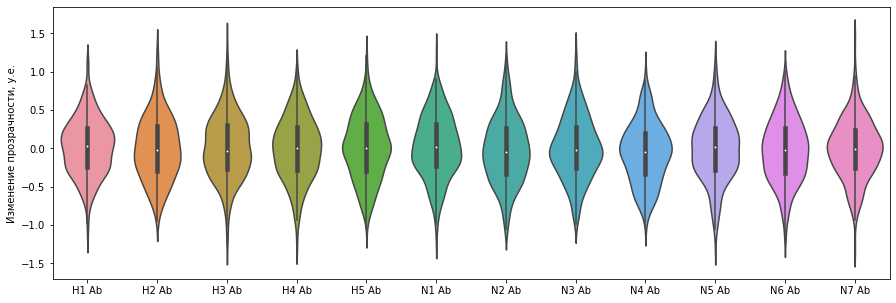

In [8]:
plt.figure(figsize=(15, 5))
plt.ylabel('Изменение прозрачности, у.е.')

sb.violinplot(
    data=healthy_data
)
plt.show()

Казалось бы, если реакции нет, то и изменение прозрачности должно строго равняться нулю.

Как видим, это не так. Подобный результат обусловлен как неточностью измерения, так и невозможностью поддерживать сторого одинаковые условия эксперимента.

## Задание

### 1. Построение `violin` графиков

Постройте два графика по образу и подобию предыдущего:
- Первый из которых включает результаты ELISA-теста для проб, полученных от заражённых пациентов, с антителами к различным вариантам гемагглютинина
- Второй &mdash; то же самое, но с антителами к нейраминидазе

In [9]:
N_antibodies = list(filter(lambda col: col[0] == 'N', ill_data.columns))
N_antibodies

['N1 Ab', 'N2 Ab', 'N3 Ab', 'N4 Ab', 'N5 Ab', 'N6 Ab', 'N7 Ab']

In [10]:
H_antibodies = list(filter(lambda col: col[0] == 'H', ill_data.columns))
H_antibodies

['H1 Ab', 'H2 Ab', 'H3 Ab', 'H4 Ab', 'H5 Ab']

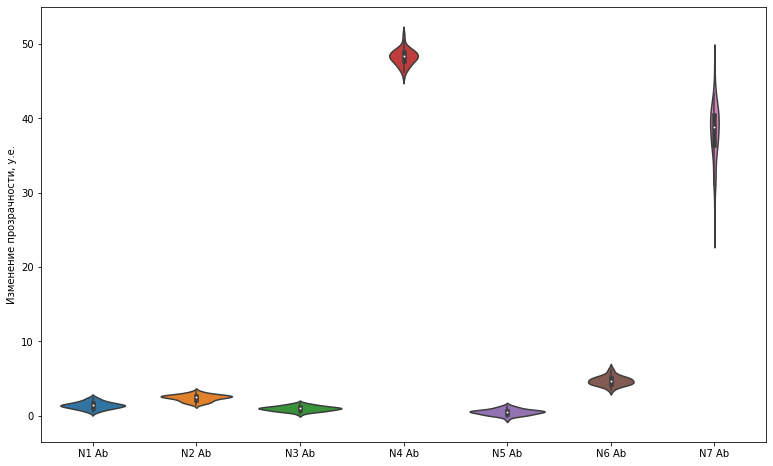

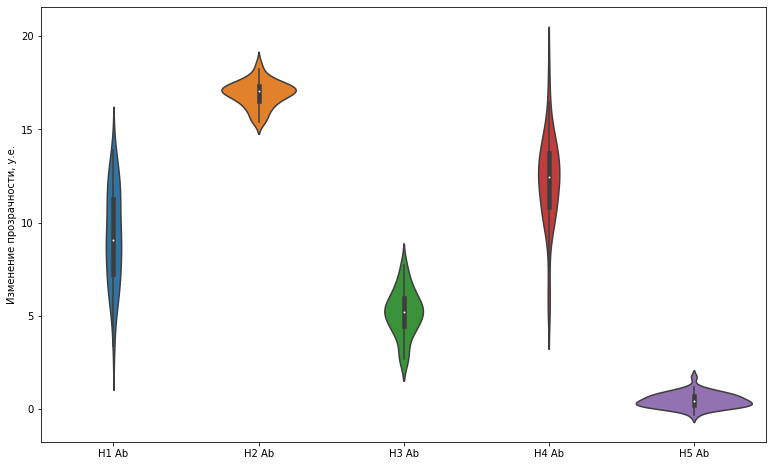

In [12]:
# YOUR CODE HERE

plt.figure(figsize=(13, 8))
plt.ylabel('Изменение прозрачности, у.е.')

sb.violinplot(
    data=ill_data[N_antibodies]
)
plt.show()

plt.figure(figsize=(13, 8))
plt.ylabel('Изменение прозрачности, у.е.')

sb.violinplot(
    data=ill_data[H_antibodies]
)
plt.show()

### 2. Анализ `violin` графиков

Проанализируйте полученные графики и определите серотип вируса.

При анализе учитывайте то, что антитело, например, к белку **H3** может иметь частичную аффинность к белкам других групп.

Признаком хорошей аффинности антитела к белкам вирионов служат как высокая амплитуда изменения прозрачности раствора, так и стабильная воспроизводимость численных значений изменения прозрачности проб от пациента к пациенту.

 При реакции антитела с вирусными частицами происходит изменение позрачности раствора. Самая высокая амплитуда к белкам N4\N7 и H2\H4 (самые большие ординаты). Т.к. признаком хорошей аффинности является ещё и стабильная воспроизводимость численных значений изменения прозрачности проб от пациента к пациенту (чёрная вертикальная полоса на графике для каждых белков), можно сделать вывод, что вирус имеет серотип **H2N4**
 
 
 

### 3. Калибровка

Предполагая,
1. Что ошибка, вносимая прибором и неоднородностью условий эксперимента, распределена как $Norm(\mu_{err},\sigma_{err}^2)$,
2. Что интенсивность реакции проб с вирусом с антителами, правильно подобранными под его серотип, распределены как $Norm(\mu_H, \sigma_H^2)$ для белка **H** и как $Norm(\mu_N, \sigma_N^2)$ для белка **N**,
3. Что ошибка из пункта 1 и интенсивность реакции из п. 2 являются независимыми случайными величинами,

По имеющимся данным дать численную несмещённую оценку $\mu_{err}$, $\sigma_{err}^2$, $\mu_{H}$, $\sigma_{H}^2$, $\mu_{N}$, $\sigma_{N}^2$.

Сохраните их в переменные так, чтобы `print` ниже отработал без ошибок. Его результат и будет являться ответом на задание.

In [15]:
# YOUR CODE HERE
h = len(healthy_data)*12
i = len(ill_data)

mu_err = healthy_data.values.mean()
disp_err = np.var(healthy_data.values)*h/(h - 1)

mu_H = ill_data['H2 Ab'].values.mean() - mu_err
disp_H = np.var(ill_data['H2 Ab'].values)*i/(i - 1) - disp_err

mu_N = ill_data['N4 Ab'].values.mean() - mu_err
disp_N = np.var(ill_data['N4 Ab'].values)*i/(i - 1) - disp_err

In [16]:
print(
    f'mu_err   = {mu_err}\n'
    f'disp_err = {disp_err}\n'
    '\n'
    f'mu_H     = {mu_H}\n'
    f'disp_H   = {disp_H}\n'
    '\n'
    f'mu_N     = {mu_N}\n'
    f'disp_N   = {disp_N}'
)

mu_err   = -0.005048637097965083
disp_err = 0.1597333760137613

mu_H     = 16.92223107157918
disp_H   = 0.31641856116194494

mu_N     = 48.287785031724795
disp_N   = 0.9708753107734929


### 4. Теоретические задачи (для отличников)

1. Пусть, $X_1,..X_n$ &mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathbb{P}(X_i=k)=\large\frac{\theta^k}{k!}\normalsize e^{-\theta}$ при $k\in\{0,1,2,..\}$.
   1. Найдите оценку $\theta$ по методу моментов;
   2. Найдите оценку $\theta$ по методу максимального правдоподобия;
   3. Проверить полученные оценки на несмещённость и состоятельность.


2. Дана выборка $X_1,..X_n$ из нормального распределения $Norm(\mu,\sigma^2)$. Найдите оценку максимального правдоподобия параметра $\theta=(\mu,\sigma).$

Решения сфотографировать (или набрать в $\LaTeX$), объединив фотографии в **один PDF**-файл с именем `<ID>.pdf`. Файл загрузить в соответсвующее место в google-формe.

<div style="text-align: right"><i>Подготовил <a href="https://github.com/andrewsonin">Андрей Сонин</a>